# Milestone 1

Nama: Wilona Natalie Elvaretta  
Batch: RMT-028
  
Program ini dibuat untuk menganalisa faktor yang berpotensi menyebabkan seseorang memutuskan untuk keluar dari perusahaan, dengan menggunakan statistik deskriptif dan inferensial. Notebook juga berisikan visualisasi data untuk memberi insight lebih.  
  
Link dashboard: https://public.tableau.com/app/profile/wilona.natalie.elvaretta/viz/h8dsft_Milestone1_wilona/Dashboard12 

## Identifikasi masalah

Akhir-akhir ini, banyak karyawan yang memutuskan untuk resign atau keluar dari tempat bekerja. Hal ini seringkali tidak disangka atau dalam ekspektasi perusahaan, dan bisa mengakibatkan **produktivitas perusahaan menurun**. Untuk menghindarinya, ingin diselidiki apa saja faktor yang mungkin menjadi alasan seseorang mengundurkan diri agar perusahaan dapat **membuat strategi untuk meningkatkan employee retention**.

### SMART framework

**S**pecific: Meningkatkan produktivitas perusahaan dengan meningkatkan employee retention  
**M**easurable: Menekan jumlah orang keluar sebanyak 50%  
**A**chievable: Menganalisa faktor yang mungkin menyebabkan seseorang keluar dan membuat strategi untuk mitigasi faktor tersebut   
**R**elevant: Meningkatkan employee retention sejalan dengan naiknya employee engagement, yang menunjang produktivitas perusahaan  
**T**ime-bound: Tercapai dalam 1 tahun ke depan

### Problem statement
Goal yang ingin diraih adalah untuk membuat strategi meningkatkan employee retention agar produktivitas perusahaan meningkat. Target tercapai jika dalam 1 tahun ke depan, banyak orang keluar turun sebanyak 50%. Strategi akan dilakukan berdasarkan analisa apa saja yang dapat menyebabkan seseorang keluar dan memitigasinya, sehingga meningkatkan employee engagement dan akhirnya meningkatkan produktivitas perusahaan.

### Problem breakdown
1. Seperti apakah demografi karyawan yang bertahan dan yang keluar?
2. Bagaimanakah tingkat kepuasan seseorang yang keluar dari perusahaan?
3. Bagaimanakan tingkat work-life balance seseorang yang keluar dari perusahaan?
4. Apakah ada perbedaan gaji antara karyawan yang keluar dengan yang bertahan? 
5. Bagaimana perbedaan karakteristik karyawan keluar dan bertahan?  
6. Apakah ada hubungan tingkat kepuasan karyawan dengan departemen ia ditempatkan? 

## Data loading

Data diambil dari Kaggle di link https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data.  

Data merupakan dataset karyawan fiktif yang dibuat oleh IBM  dan dapat digunakan untuk menganalisa faktor yang mungkin memengaruhi keluarnya karyawan dari perusahaan.

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
# Load data csv ke notebook
df = pd.read_csv("wilona_data.csv") 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Melihat semua kolom pada df
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data cleaning

Ada 35 kolom pada `df`, dan pada analisa ini tidak akan semuanya digunakan. Maka, beberapa kolom akan dihapus.

In [4]:
df.drop(["DailyRate", "EducationField", "EmployeeCount", "HourlyRate", "JobRole", "MonthlyRate", "Over18", "StockOptionLevel",
"JobInvolvement", "TrainingTimesLastYear", "YearsInCurrentRole", "PerformanceRating", "StandardHours"], axis = 1, inplace = True)

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Selanjutnya, nama kolom akan diganti menjadi lebih singkat.

In [5]:
df.rename(columns = {"Age":"age", "Attrition":"exit" , "BusinessTravel":"travel", "DistanceFromHome":"homeDist", 
"Education":"edu", "EmployeeNumber":"id", "EnvironmentSatisfaction":"envrStf", "Gender":"gender", "JobSatisfaction":"jobStf", 
"MaritalStatus":"marital", "MonthlyIncome":"monthSal", "NumCompaniesWorked": "pastComp", "OverTime":"overtime", 
"PercentSalaryHike":"salInc", "RelationshipSatisfaction":"relStf", "TotalWorkingYears":"workYrs", 
"WorkLifeBalance":"wlBal", "YearsAtCompany":"compYrs", "YearsSinceLastPromotion":"lastPromYrs", "YearsWithCurrManager":"currManYrs", 
"JobLevel":"jobLvl", "Department":"dept"}, inplace = True)

df.columns

Index(['age', 'exit', 'travel', 'dept', 'homeDist', 'edu', 'id', 'envrStf',
       'gender', 'jobLvl', 'jobStf', 'marital', 'monthSal', 'pastComp',
       'overtime', 'salInc', 'relStf', 'workYrs', 'wlBal', 'compYrs',
       'lastPromYrs', 'currManYrs'],
      dtype='object')

Kemudian ingin dilihat apakah ada nilai null dan apakah tipe data sudah sesuai.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          1470 non-null   int64 
 1   exit         1470 non-null   object
 2   travel       1470 non-null   object
 3   dept         1470 non-null   object
 4   homeDist     1470 non-null   int64 
 5   edu          1470 non-null   int64 
 6   id           1470 non-null   int64 
 7   envrStf      1470 non-null   int64 
 8   gender       1470 non-null   object
 9   jobLvl       1470 non-null   int64 
 10  jobStf       1470 non-null   int64 
 11  marital      1470 non-null   object
 12  monthSal     1470 non-null   int64 
 13  pastComp     1470 non-null   int64 
 14  overtime     1470 non-null   object
 15  salInc       1470 non-null   int64 
 16  relStf       1470 non-null   int64 
 17  workYrs      1470 non-null   int64 
 18  wlBal        1470 non-null   int64 
 19  compYrs      1470 non-null 

Data tidak mengandung null values.  
Namun, untuk data kategorikal dalam bentuk angka akan diganti valuesnya menjadi dalam string (agar lebih mudah saat visualisasi) dan disesuaikan tipe datanya menjadi `category`. 

In [7]:
# Mengganti value string dengan angka
df["travel"].replace({"Non-Travel":"None", "Travel_Rarely":"Rarely", "Travel_Frequently":"Frequently"}, inplace = True)
df["edu"].replace({1:"Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"}, inplace = True)
df["envrStf"].replace({1:"Low", 2:"Medium", 3:"High", 4:"Very High"}, inplace = True)
df["jobStf"].replace({1:"Low", 2:"Medium", 3:"High", 4:"Very High"}, inplace = True)
df["relStf"].replace({1:"Low", 2:"Medium", 3:"High", 4:"Very High"}, inplace = True)
df["wlBal"].replace({1:"Bad", 2:"Good", 3:"Better", 4:"Best"}, inplace = True)

df.head()

,age,exit,travel,dept,homeDist,edu,id,envrStf,gender,jobLvl,...,monthSal,pastComp,overtime,salInc,relStf,workYrs,wlBal,compYrs,lastPromYrs,currManYrs
0,41,Yes,Rarely,Sales,1,College,1,Medium,Female,2,...,5993,8,Yes,11,Low,8,Bad,6,0,5
1,49,No,Frequently,Research & Development,8,Below College,2,High,Male,2,...,5130,1,No,23,Very High,10,Better,10,1,7
2,37,Yes,Rarely,Research & Development,2,College,4,Very High,Male,1,...,2090,6,Yes,15,Medium,7,Better,0,0,0
3,33,No,Frequently,Research & Development,3,Master,5,Very High,Female,1,...,2909,1,Yes,11,High,8,Better,8,3,0
4,27,No,Rarely,Research & Development,2,Below College,7,Low,Male,1,...,3468,9,No,12,Very High,6,Better,2,2,2


In [8]:
# Mengubah tipe data ke categorical
catList = ["gender", "marital", "edu", "dept", "travel", "envrStf", "jobStf", "relStf", "wlBal", "overtime"]
for cat in catList:
    df[cat] = pd.Categorical(df[cat])
df["exit"] = pd.Categorical(df["exit"])

Di-cek kembali tipe data untuk semua variabel.

In [9]:
# Melihat tipe data
df.dtypes

age               int64
exit           category
travel         category
dept           category
homeDist          int64
edu            category
id                int64
envrStf        category
gender         category
jobLvl            int64
jobStf         category
marital        category
monthSal          int64
pastComp          int64
overtime       category
salInc            int64
relStf         category
workYrs           int64
wlBal          category
compYrs           int64
lastPromYrs       int64
currManYrs        int64
dtype: object

Selanjutnya akan diperiksa apakah ada data duplikat atau tidak.

In [10]:
len(df) - len(df.drop_duplicates())

0

## Analisis dan perhitungan

### Demografi karyawan

Ingin dilihat terlebih dahulu demografi karyawan secara keseluruhan.

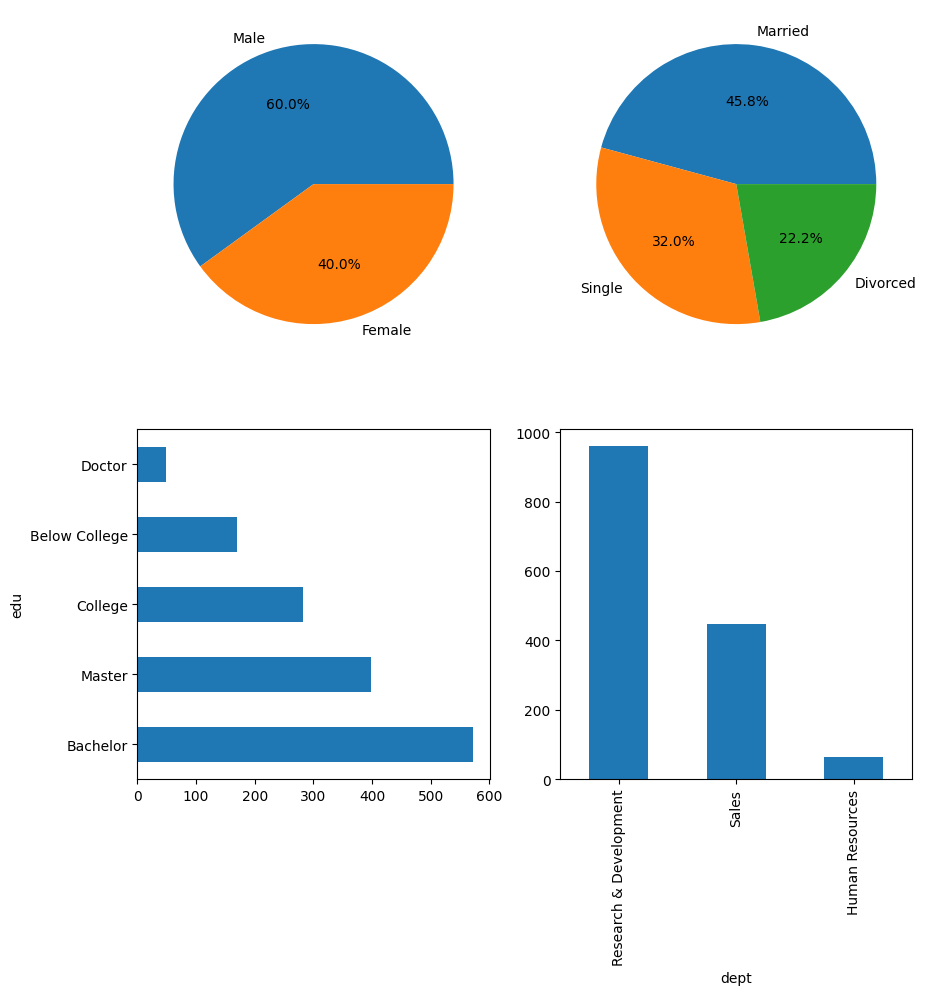

In [11]:
# Membuat chart demografi keseluruhan karyawan
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

axes[0,0].pie(df["gender"].value_counts(), labels = ["Male", "Female"], autopct='%1.1f%%')
axes[0,1].pie(df["marital"].value_counts(), labels = ["Married", "Single", "Divorced"], autopct='%1.1f%%')
df["edu"].value_counts().plot(kind = "barh", ax = axes[1,0])
df["dept"].value_counts().plot(kind = "bar", ax = axes[1,1])

plt.show()


#### Insight
1. Lebih banyak karyawan laki-laki dibandingkan perempuan, dengan perbandingan 60:40
2. Hampir setengah dari karyawan sudah menikah, dengan sisanya berstatus lajang atau sudah bercerai 
3. Ada 3 departemen yang diamati pada data ini, yaitu HR, R&D, dan Sales. Departemen R&D memiliki anggota terbanyak
4. Gelar akademik karyawan cukup bervariasi, namun paling banyak ditemukan sarjana di antara karyawan

Kemudian ingin dilihat demografi dari karyawan yang keluar saja. 

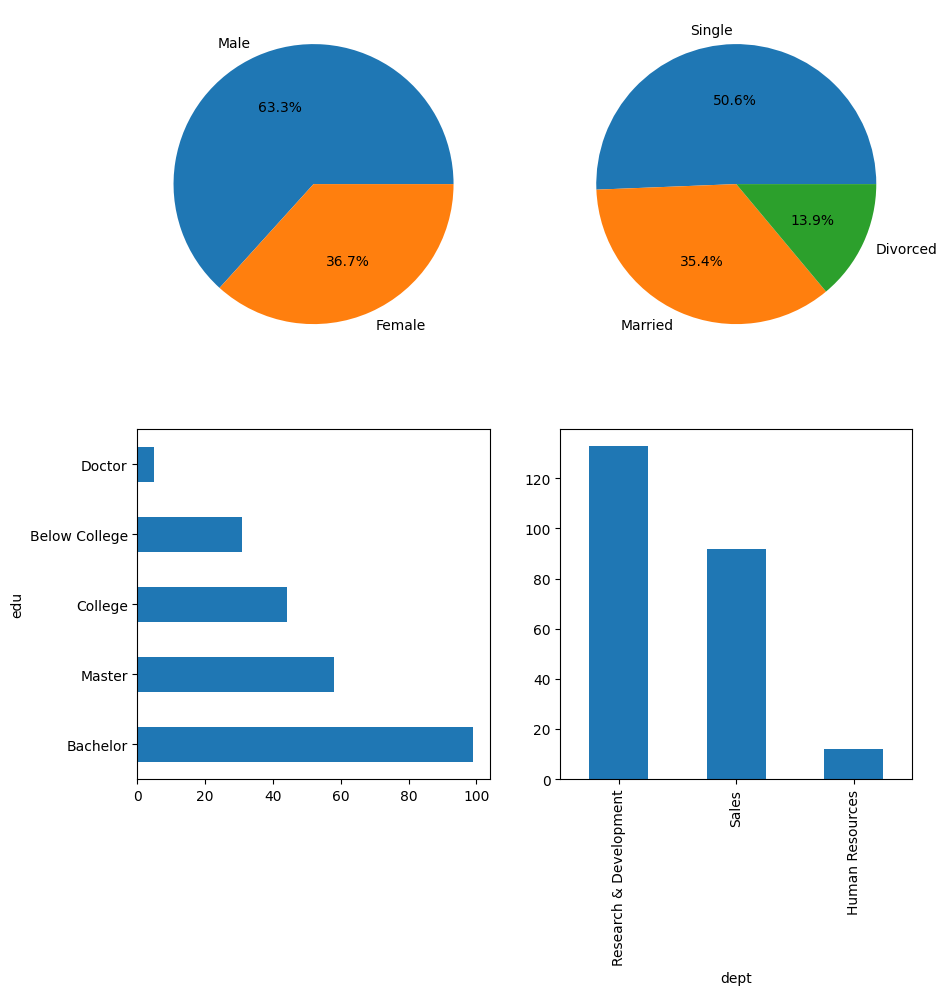

In [12]:
# Membuat chart demografi keseluruhan karyawan
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

axes[0,0].pie(df[df["exit"] == "Yes"]["gender"].value_counts(), labels = ["Male", "Female"], autopct='%1.1f%%')
axes[0,1].pie(df[df["exit"] == "Yes"]["marital"].value_counts(), labels = ["Single", "Married", "Divorced"], autopct='%1.1f%%')
df[df["exit"] == "Yes"]["edu"].value_counts().plot(kind = "barh", ax = axes[1,0])
df[df["exit"] == "Yes"]["dept"].value_counts().plot(kind = "bar", ax = axes[1,1])

plt.show()

#### Insight  
1. Mayoritas karyawan exit adalah laki-laki
2. Lebih dari setengah karyawan exit masih lajang
3. Departemen R&D kehilangan paling banyak karyawan
4. Orang yang paling banyak keluar bergelar sarjana

### Tingkat kepuasan karyawan keluar

Text(0.5, 1.0, 'Kepuasan relasi kerja')

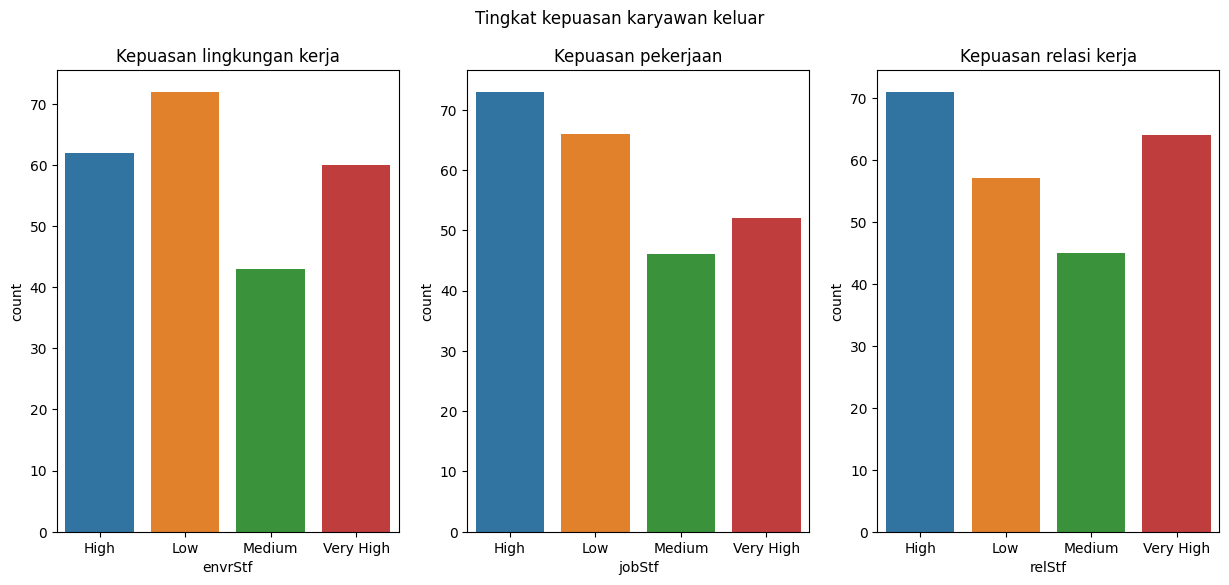

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle("Tingkat kepuasan karyawan keluar")
sns.countplot(data = df[df["exit"] == "Yes"], x = "envrStf", hue = "envrStf", ax = axes[0])
sns.countplot(data = df[df["exit"] == "Yes"], x = "jobStf", hue = "jobStf", ax = axes[1])
sns.countplot(data = df[df["exit"] == "Yes"], x = "relStf", hue = "relStf", ax = axes[2])

axes[0].set_title('Kepuasan lingkungan kerja')
axes[1].set_title('Kepuasan pekerjaan')
axes[2].set_title('Kepuasan relasi kerja')

In [23]:
df1 = pd.DataFrame(df[["envrStf", "jobStf", "relStf"]])
df1

,envrStf,jobStf,relStf
0,Medium,Very High,Low
1,High,Medium,Very High
2,Very High,High,Medium
3,Very High,High,High
4,Low,Medium,Very High
...,...,...,...
1465,High,Very High,High
1466,Very High,Low,Low
1467,Medium,Medium,Medium
1468,Very High,Medium,Very High


Dari garafik di atas, tingkat kepuasan karyawan resign untuk lingkungan kerja rendah dibandingkan dengan 2 lainnya. Maka, faktor lingkungan kerja bisa hal yang dimonitor dan dievaluasi ke depannya dalam mempertahankan karyawan.

### Tingkat work-life balance karyawan yang keluar

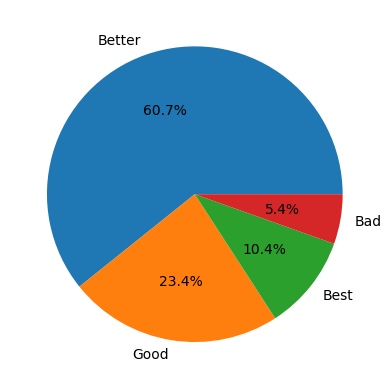

In [14]:
plt.pie(df["wlBal"].value_counts(), labels = ["Better", "Good", "Best", "Bad"], autopct='%1.1f%%')
plt.show()

Ternyata, karyawan yang keluar berpendapat work-life balance mereka lebih dari baik. Bahkan hanya sekitar 5% yang memiliki tingkat work-life balance rendah. Ini menjadi temuan bahwa ada kemungkinan seseorang akan memutuskan keluar dari perusahaan walaupun ia merasa porsi pekerjaan dan kehidupan pribadinya seimbang.

### Perbedaan distribusi gaji karyawan keluar dan bertahan

Ingin dilihat dari boxplot, apakah ada perbedaan antara gaji karyawan yang bertahan dengan gaji karyawan yang keluar.

<Axes: xlabel='monthSal', ylabel='exit'>

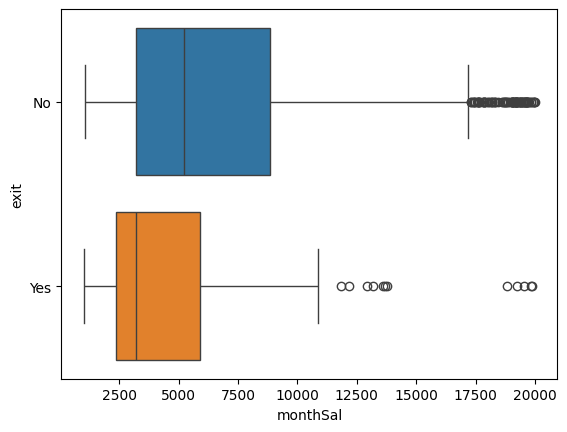

In [15]:
sns.boxplot(data = df, x = "monthSal", y = "exit", hue = "exit")

Ternyata secara keseluruhan data, gaji karyawan yang keluar lebih rendah dibandingkan gaji karyawan yang bertahan. Ini bisa jadi pertanda bahwa karyawan yang keluar ingin mencari pekerjaan di tempat lain yang menawarkan gaji lebih tinggi.

### Ciri-ciri karyawan yang keluar dibandingkan karyawan bertahan

Dengan statistik deskritpif variabel, ingin dipahami variabel apa sajakah yang potensial menyebabkan seseorang keluar dengan membandingkannya dengan kaakteristik karyawan bertahan.

In [16]:
# Statistik deskriptif data numerik orang keluar
numList = ['age', 'monthSal', 'salInc', 'workYrs', 'compYrs', 'lastPromYrs', 'currManYrs', 'pastComp', 'homeDist']
dfExit = df[df["exit"] == "Yes"]

modExit = dfExit[numList].mode().transpose()
modeExit = modExit[0]
statDExit = pd.DataFrame({"min":dfExit[numList].min(), "max":dfExit[numList].max(), "mean":dfExit[numList].mean(), "median":dfExit[numList].median(), 
"mode":modeExit})
statDExit


,min,max,mean,median,mode
age,18,58,33.607595,32.0,29.0
monthSal,1009,19859,4787.092827,3202.0,2293.0
salInc,11,25,15.097046,14.0,11.0
workYrs,0,40,8.244726,7.0,1.0
compYrs,0,40,5.130802,3.0,1.0
lastPromYrs,0,15,1.945148,1.0,0.0
currManYrs,0,14,2.852321,2.0,0.0
pastComp,0,9,2.940928,1.0,1.0
homeDist,1,29,10.632911,9.0,2.0


In [17]:
# Statistik deskriptif data categorical orang keluar
dfExit[catList].describe()

,gender,marital,edu,dept,travel,envrStf,jobStf,relStf,wlBal,overtime
count,237,237,237,237,237,237,237,237,237,237
unique,2,3,5,3,3,4,4,4,4,2
top,Male,Single,Bachelor,Research & Development,Rarely,Low,High,High,Better,Yes
freq,150,120,99,133,156,72,73,71,127,127


In [18]:
# Statistik deskriptif data numerik orang bertahan
dfStay = df[df["exit"] == "No"]

modStay = dfStay[numList].mode().transpose()
modeStay = modStay[0]
statDStay = pd.DataFrame({"min":dfStay[numList].min(), "max":dfStay[numList].max(), "mean":dfStay[numList].mean(), "median":dfStay[numList].median(), 
"mode":modeStay})
statDStay


,min,max,mean,median,mode
age,18,60,37.561233,36.0,34.0
monthSal,1051,19999,6832.739659,5204.0,2342.0
salInc,11,25,15.231144,14.0,14.0
workYrs,0,38,11.862936,10.0,10.0
compYrs,0,37,7.369019,6.0,5.0
lastPromYrs,0,15,2.234388,1.0,0.0
currManYrs,0,17,4.367397,3.0,2.0
pastComp,0,9,2.645580,2.0,1.0
homeDist,1,29,8.915653,7.0,2.0


In [19]:
# Statistik deskriptif data categorical orang bertahan
dfStay[catList].describe()

,gender,marital,edu,dept,travel,envrStf,jobStf,relStf,wlBal,overtime
count,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
unique,2,3,5,3,3,4,4,4,4,2
top,Male,Married,Bachelor,Research & Development,Rarely,High,Very High,High,Better,No
freq,732,589,473,828,887,391,407,388,766,944


#### Insight
1. Kepuasan rendah terhadap lingkungan kerja dapat diselidiki sebagai penyebab resign
2. Sebagian besar karyawan yang resign, melakukan overtime
3. Rata-rata jarak rumah ke kantor untuk karyawan exit lebih besar dibandingkan karyawan bertahan
4. Karyawan yang keluar memiliki rata-rata lama bekerja lebih rendah dibanding karyawan bertahan 
5. Rata-rata gaji karyawan yang keluar lebih rendah dari rata-rata gaji karyawan bertahan

### Hubungan tingkat kepuasan dan keputusan seseorang keluar atau bertahan

Akan dilihat apakah tingkat kepuasan seseorang terhadap pekerjaan, lingkungan kerja, dan hubungan kerja berhubungan dengan keputusannya keluar. Karena semua variabel kategorikal, akan digunakan Chi-Squared Test, dengan hipotesis:  
  
$ H_0 $: Tidak ada hubungan antara 2 variabel  
$ H_1 $: Ada hubungan antara 2 variabel

In [20]:
contingency_table1 = pd.crosstab(df["envrStf"],df["dept"])
res1 = stats.chi2_contingency(contingency_table1)

contingency_table2 = pd.crosstab(df["jobStf"],df["dept"])
res2 = stats.chi2_contingency(contingency_table2)

contingency_table3 = pd.crosstab(df["relStf"],df["dept"])
res3 = stats.chi2_contingency(contingency_table3)

print(f"Kepuasan lingkungan kerja vs Departemen\nP-value: {res1.pvalue}\n")
print(f"Kepuasan pekerjaan vs Departemen\nP-value: {res2.pvalue}\n")
print(f"Kepuasan relasi kerja vs Departemen\nP-value: {res3.pvalue}")

Kepuasan lingkungan kerja vs Departemen
P-value: 0.32684009274494286

Kepuasan pekerjaan vs Departemen
P-value: 0.20189678484148324

Kepuasan relasi kerja vs Departemen
P-value: 0.3074928277825121


Dengan tingkat signifikansi 5%, dapat disimpulkan bahwa tidak ada hubungan antara kepuasan lingkungan kerja, kepuasan pekerjaan, dan kepuasan akan relasi kerja dengan di departemen mana ia ditempatkan.  
Temuan ini dapat diartikan sebagai seseorang menentukan kepuasannya mungkin dengan melihat perusahaan secara keseluruhan dan bukan per departemen.

## Pengambilan keputusan

Dari analisa yang dilakukan, ada beberapa poin yang menjadi highlight:
1. Sebagian besar karyawan keluar merasa kurang puas dengan lingkungan bekerja di perusahaan
2. Work-life balance di perusahaan dinilai cukup baik oleh karyawan keluar
3. Ada perbedaan gaji secara umum antara karyawan bertahan dengan karyawan yang keluar, di mana gaji karyawan keluar lebih rendah
4. Karyawan keluar banyak yang melakukan overtime
5. Rata-rata jarak rumah ke kantor untuk karyawan exit lebih besar dibandingkan karyawan bertahan

> Maka, strategi yang dapat direkomendasikan untuk meningkatkan employee retention adalah:
1. Mengevaluasi keadaan lingkungan kerja di perusahaan dengan mendiskusikannya secara langsung ke karyawan (apa yang membuat mereka kurang puas, harapan apa yang dimiliki untuk ada di kantor), dan membuat event perusahaan untuk bonding dengan karyawan
2. Mempertahankan tingkat work-life balance
3. Meninjau perbedaan gaji yang terjadi antara karyawan keluar dan bertahan apakah faktor pembedanya, dan ke depannya me-review ulang skema gaji karyawan
4. Mengurangi karyawan yang bekerja overtime dengan menerapkan policy tertentu, atau mencoba menerapkan jam kerja fleksibel
5. Memastikan di tahap rekrutmen bahwa jarak tempat tinggal yang jauh dari kantor adalah tanggung jawab karyawan, dan memberikan tunjangan transportasi dengan kondisi tertentu

## Dashboard

Data `df` akan di-import agar bisa dipakai di pembuatan dashboard.
Link dashboard ada di bagian atas notebook ini.

In [22]:
df.to_csv("wilona_data_clean.csv", index = False)